# Confocal Laser Scanning Microscope & PSF

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sgn
from numpy.random import poisson
import os
import imageio
import math
from sklearn.metrics import mean_squared_error


import brighteyes_ism.analysis.APR_lib as apr
import brighteyes_ism.analysis.Deconv_lib as deconv
import brighteyes_ism.analysis.FRC_lib as frc
import brighteyes_ism.analysis.FocusISM_lib as fism

import brighteyes_ism.simulation.PSF_sim as ism
import brighteyes_ism.simulation.Tubulin_sim as simTub

## Point-spread functions

### Simulation settings

In [2]:
N = 1 # number of detector elements in each dimension

center = math.ceil(N*N/2) # Middle element
Nx = 513 # number of pixels of the simulation space. (Ground Truth)
pxsizex = 25 # pixel size of the simulation space (nm) 
pxdim = 50e3 # detector element size in real space (nm)
pxpitch = 75e3 # detector element pitch in real space (nm)
## Difference betweeb detector element size and pitch?
M = 500 # total magnification of the optical system (e.g. 100x objective follewd by 5x telescope)

#%% PSF simulation 2D

exPar = ism.simSettings()
exPar.wl = 640 # excitation wavelength (nm)
exPar.mask_sampl = 31

emPar = exPar.copy()
emPar.wl = 660 # emission wavelength (nm)

z_shift = 0 #nm

### Generate excitation PSF and detection PSFs

In [3]:
PSF5by5, detPSF, exPSF = ism.SPAD_PSF_2D(N, Nx, pxpitch, pxdim, pxsizex, M, exPar, emPar, z_shift=z_shift)

PSF5by5 /= np.max(PSF5by5)

# Why two times calculating field near the focus

Calculating field near the focus:


XY plane: 100%|██████████████████████████████████████████████████████████████████████| 513/513 [01:10<00:00,  7.23it/s]


Calculating field near the focus:


XY plane: 100%|██████████████████████████████████████████████████████████████████████| 513/513 [01:10<00:00,  7.24it/s]


### Plot PSF (5x5)

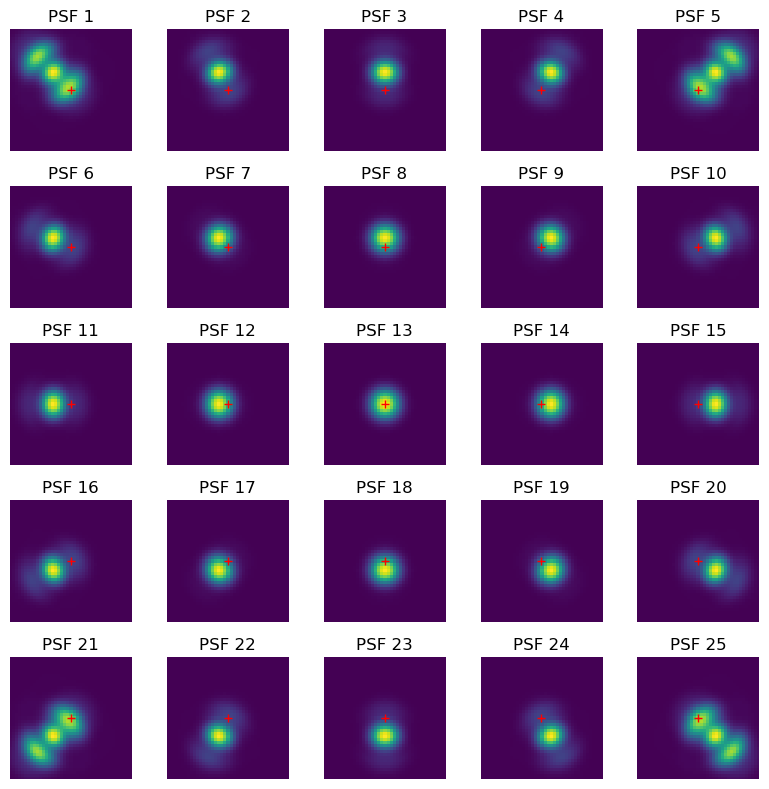

In [4]:
fig = plt.figure(figsize=(8,8))
for i in range(N*N):
    ax = fig.add_subplot(N, N, i+1)
    ax.imshow(PSF5by5[:,:,i], extent = [-(Nx//2*pxsizex), Nx//2*pxsizex, -(Nx//2*pxsizex), Nx//2*pxsizex])
    ax.set_xlim(-500, 500)
    ax.set_ylim(-500, 500)
    ax.plot(0,0,'+r')
    ax.set_title("PSF " + str(i + 1))
    plt.axis('off')

plt.tight_layout()

## Tubulin

### Simulate ground truth

  4%|███▎                                                                               | 1/25 [00:09<03:45,  9.40s/it]

tubulin filament out of the boundaries [407.94208263] [-0.32834845] 513


  8%|██████▋                                                                            | 2/25 [00:12<02:11,  5.74s/it]

tubulin filament out of the boundaries [267.64446322] [513.10926048] 513


 12%|█████████▉                                                                         | 3/25 [00:17<02:02,  5.59s/it]

tubulin filament out of the boundaries [-0.38117369] [299.21723509] 513


 16%|█████████████▎                                                                     | 4/25 [00:25<02:09,  6.18s/it]

tubulin filament out of the boundaries [447.40821925] [-0.31505284] 513


 20%|████████████████▌                                                                  | 5/25 [00:25<01:20,  4.04s/it]

tubulin filament out of the boundaries [23.70306099] [513.07070156] 513


 24%|███████████████████▉                                                               | 6/25 [00:30<01:25,  4.51s/it]

tubulin filament out of the boundaries [-0.2857651] [125.65467444] 513


 28%|███████████████████████▏                                                           | 7/25 [00:35<01:21,  4.53s/it]

tubulin filament out of the boundaries [402.13739389] [-0.68781763] 513


 32%|██████████████████████████▌                                                        | 8/25 [00:41<01:23,  4.91s/it]

tubulin filament out of the boundaries [513.28767025] [268.55572919] 513


 36%|█████████████████████████████▉                                                     | 9/25 [00:42<01:00,  3.80s/it]

tubulin filament out of the boundaries [106.16363649] [-0.30480782] 513


 40%|████████████████████████████████▊                                                 | 10/25 [00:49<01:11,  4.77s/it]

tubulin filament out of the boundaries [513.37234147] [157.21367162] 513


 44%|████████████████████████████████████                                              | 11/25 [00:54<01:09,  4.93s/it]

tubulin filament out of the boundaries [314.03511083] [513.61692499] 513


 48%|███████████████████████████████████████▎                                          | 12/25 [01:00<01:08,  5.29s/it]

tubulin filament out of the boundaries [265.52711007] [-0.46364242] 513


 52%|██████████████████████████████████████████▋                                       | 13/25 [01:03<00:55,  4.66s/it]

tubulin filament out of the boundaries [-0.70078664] [107.36776772] 513


 56%|█████████████████████████████████████████████▉                                    | 14/25 [01:13<01:07,  6.10s/it]

tubulin filament out of the boundaries [513.03245044] [389.06633739] 513


 60%|█████████████████████████████████████████████████▏                                | 15/25 [01:18<00:56,  5.68s/it]

tubulin filament out of the boundaries [358.29105058] [-0.0531992] 513


 64%|████████████████████████████████████████████████████▍                             | 16/25 [01:23<00:50,  5.56s/it]

tubulin filament out of the boundaries [262.41364336] [-0.66499479] 513


 68%|███████████████████████████████████████████████████████▊                          | 17/25 [01:28<00:44,  5.52s/it]

tubulin filament out of the boundaries [513.6873562] [319.55179098] 513


 72%|███████████████████████████████████████████████████████████                       | 18/25 [01:29<00:28,  4.11s/it]

tubulin filament out of the boundaries [77.00952297] [513.25642666] 513


 76%|██████████████████████████████████████████████████████████████▎                   | 19/25 [01:31<00:21,  3.52s/it]

tubulin filament out of the boundaries [184.07804967] [513.05567146] 513


 80%|█████████████████████████████████████████████████████████████████▌                | 20/25 [01:40<00:25,  5.14s/it]

tubulin filament out of the boundaries [-0.21185708] [415.10112725] 513


 84%|████████████████████████████████████████████████████████████████████▉             | 21/25 [01:43<00:17,  4.37s/it]

tubulin filament out of the boundaries [140.62265486] [513.37238392] 513


 88%|████████████████████████████████████████████████████████████████████████▏         | 22/25 [01:45<00:11,  3.73s/it]

tubulin filament out of the boundaries [176.22686023] [-0.00290383] 513


 92%|███████████████████████████████████████████████████████████████████████████▍      | 23/25 [01:48<00:07,  3.54s/it]

tubulin filament out of the boundaries [279.74902815] [513.85960209] 513


 96%|██████████████████████████████████████████████████████████████████████████████▋   | 24/25 [01:50<00:03,  3.13s/it]

tubulin filament out of the boundaries [95.61966336] [513.20512523] 513


100%|██████████████████████████████████████████████████████████████████████████████████| 25/25 [01:51<00:00,  4.47s/it]
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


tubulin filament out of the boundaries [57.57623079] [513.14316849] 513


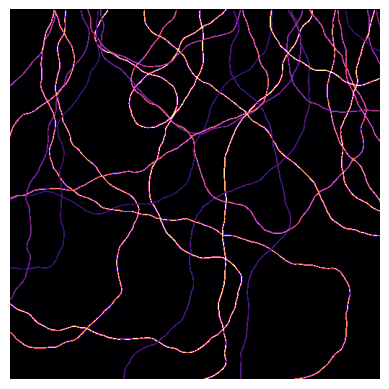

In [146]:
#%% Generate tubulin

tubulin = simTub.tubSettings()
tubulin.xy_pixel_size = pxsizex
tubulin.xy_dimension = Nx
tubulin.xz_dimension = 1     
tubulin.z_pixel = 1     
tubulin.n_filament = 25
tubulin.radius_filament = pxsizex*0.9
tubulin.intensity_filament = [0.2,0.9]  
phTub = simTub.functionPhTub(tubulin)
plt.figure()
plt.imshow(phTub[:,:,0],cmap='magma')
plt.axis('off')

TubDec = phTub[:,:,0]

# Specify the file path and name
file_path = 'data/temp/'
file_name = 'GroundTruth.png'

# Save the image as a PNG file
imageio.imwrite(file_path + file_name, phTub[:,:,0])


### Acquire Full Data in 5x5

In [147]:
#%% Convolve tubulin with psf
N = 5 # number of detector elements in each dimension
img5by5 = np.empty(PSF5by5.shape)

for n in range(N**2):
    img5by5[:, :, n] = sgn.convolve(TubDec, PSF5by5[:, :, n] ,mode = 'same')

#%% Convert to photons and add Poisson noise
img5by5 *= 1e2
img5by5 = np.uint16(img5by5)
img5by5 = poisson(img5by5)

### Plot the Detector Images (5x5)

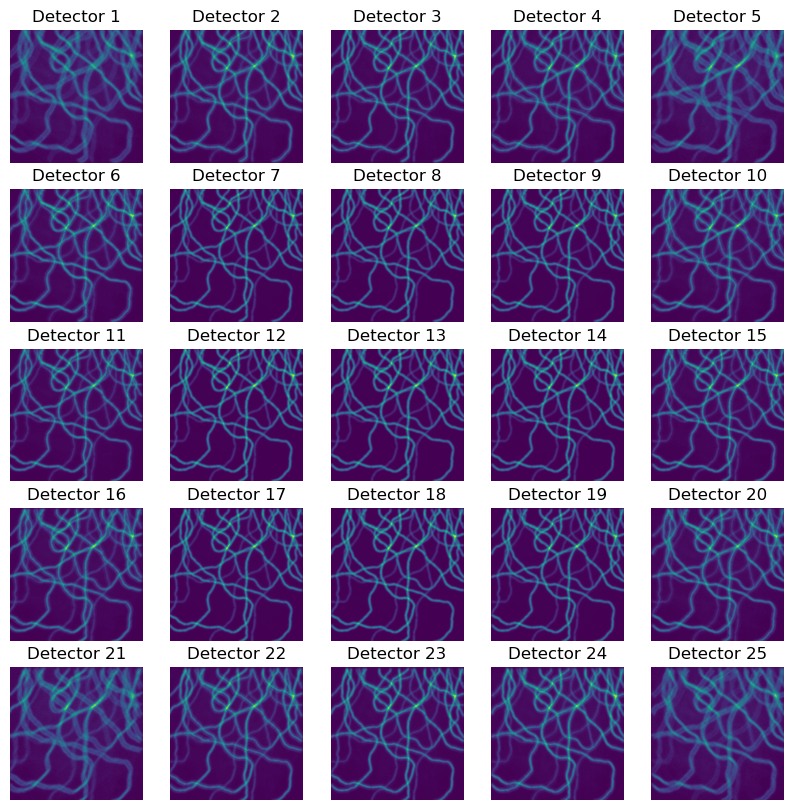

In [148]:
# Plot it
fig = plt.figure(figsize=(10,10))
for i in range(N*N):
    ax = fig.add_subplot(N, N, i+1)
    ax.imshow(img5by5[:,:,i])
    ax.set_title("Detector " + str(i + 1))
    plt.axis('off')    

### Select  3x3 from 5x5

In [149]:
img3by3 = np.empty((513, 513, 9)) # create new 513-by-513-by-9 array
# 
oldIdx = [7, 8, 9, 12, 13, 14, 17, 18, 19]
newIdx = [1, 2, 3, 4, 5, 6, 7, 8, 9]
#     
for n, o in zip(newIdx, oldIdx):
    img3by3[:, :, n-1] = img5by5[:, :, o-1]
    
    
PSF3by3 = np.empty((513, 513, 9)) # create new 513-by-513-by-9 array

oldIdx = [7, 8, 9, 12, 13, 14, 17, 18, 19]
newIdx = [1, 2, 3, 4, 5, 6, 7, 8, 9]
    
for n, o in zip(newIdx, oldIdx):
    PSF3by3[:, :, n-1] = PSF5by5[:, :, o-1]

## Plot and Save (3x3)

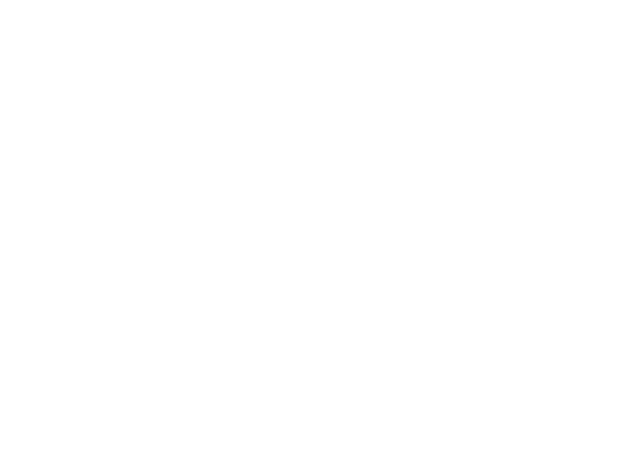

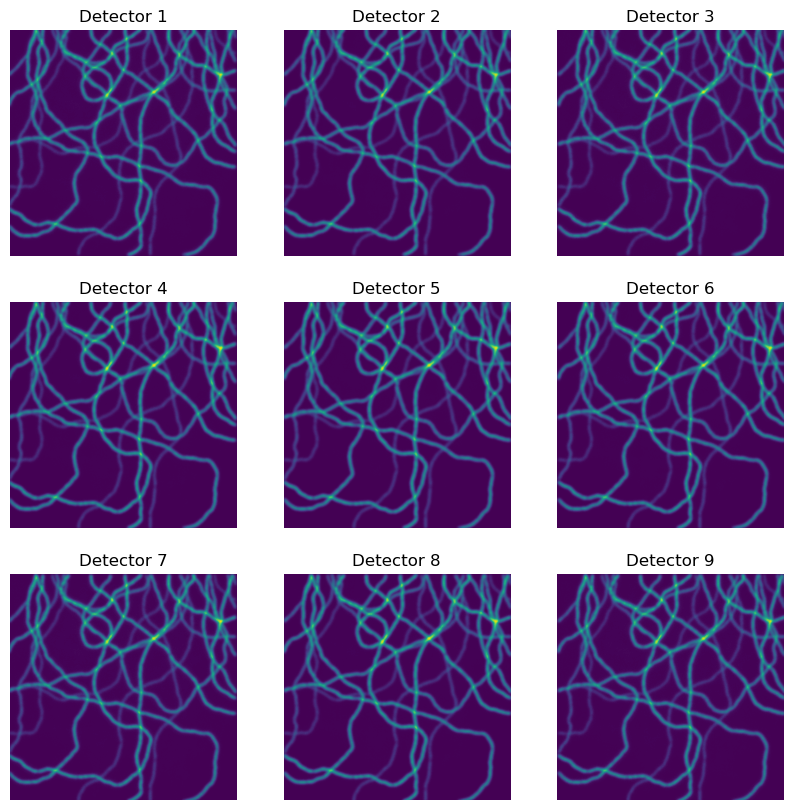

In [150]:
N = 3

# fig = plt.figure(figsize=(8,8))


for i in range(N*N):
    ax = fig.add_subplot(N, N, i+1)
    ax.imshow(PSF3by3[:,:,i], extent = [-(Nx//2*pxsizex), Nx//2*pxsizex, -(Nx//2*pxsizex), Nx//2*pxsizex])
    ax.set_xlim(-500, 500)
    ax.set_ylim(-500, 500)
    ax.plot(0,0,'+r')
    ax.set_title("PSF " + str(i + 1))
    plt.axis('off')

plt.tight_layout()


# Plot it
fig = plt.figure(figsize=(10,10))
for i in range(N*N):
    ax = fig.add_subplot(N, N, i+1)
    ax.imshow(img3by3[:,:,i])
    ax.set_title("Detector " + str(i + 1))
    plt.axis('off')
    
# Save each image of the detector   
for i in range(img3by3.shape[2]):
    fig, axs = plt.subplots(figsize=(10, 5))
    axs.imshow(img3by3[:,:,i])
    axs.axis('off')
    plt.savefig(f"data/temp/detector_{i+1}.png", bbox_inches='tight', pad_inches=0)
    plt.close(fig)
    

## Sample the Data (Matlab)

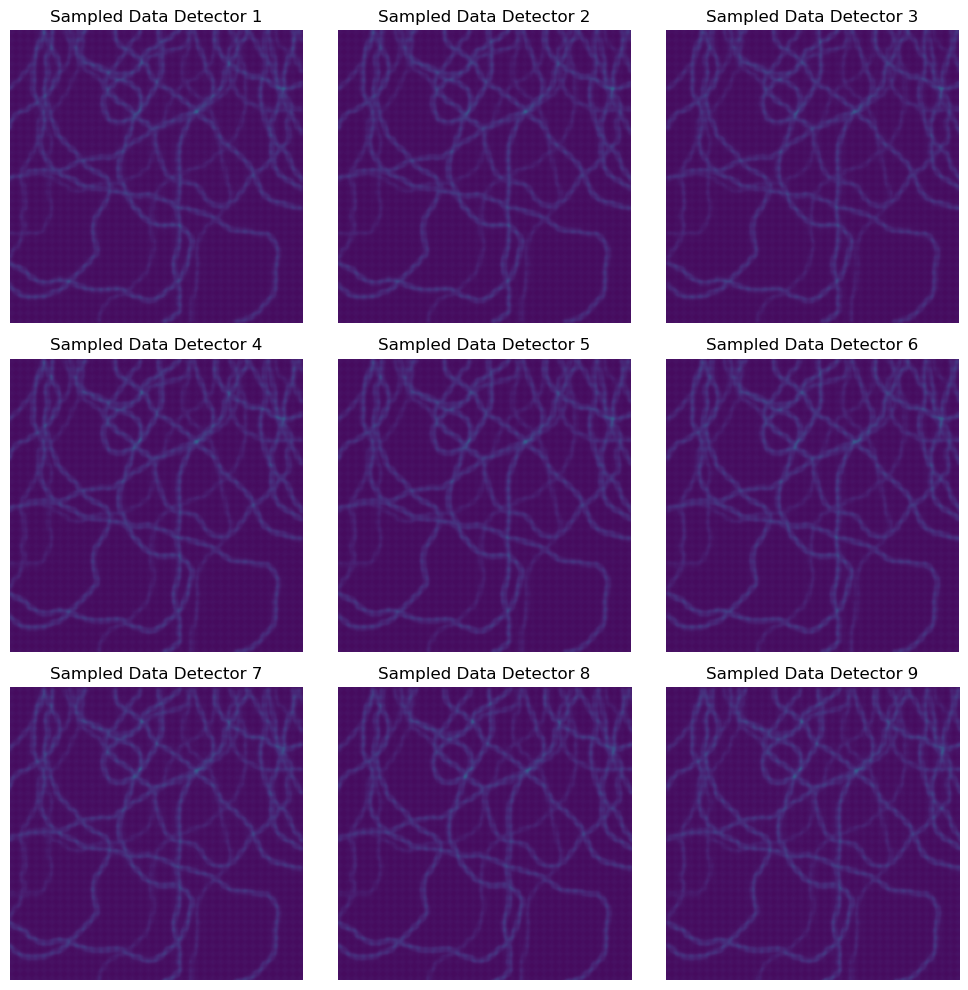

In [151]:
folder_path = "data/temp"
image_prefix = "measure_"

N = 3
fig, axes = plt.subplots(N, N, figsize=(10, 10))

# Loop over the image indices and plot them in a 3 by 3 grid
for i, ax in enumerate(axes.flatten()):
    image_filename = image_prefix + str(i + 1) + ".png"
    image_path = os.path.join(folder_path, image_filename)

    # Read the image and display it
    image = plt.imread(image_path)
    ax.imshow(image, cmap="viridis")
    ax.axis('off')
    ax.set_title("Sampled Data Detector " + str(i + 1))

plt.tight_layout()
plt.show()

## Reconstructed Image (Matlab)

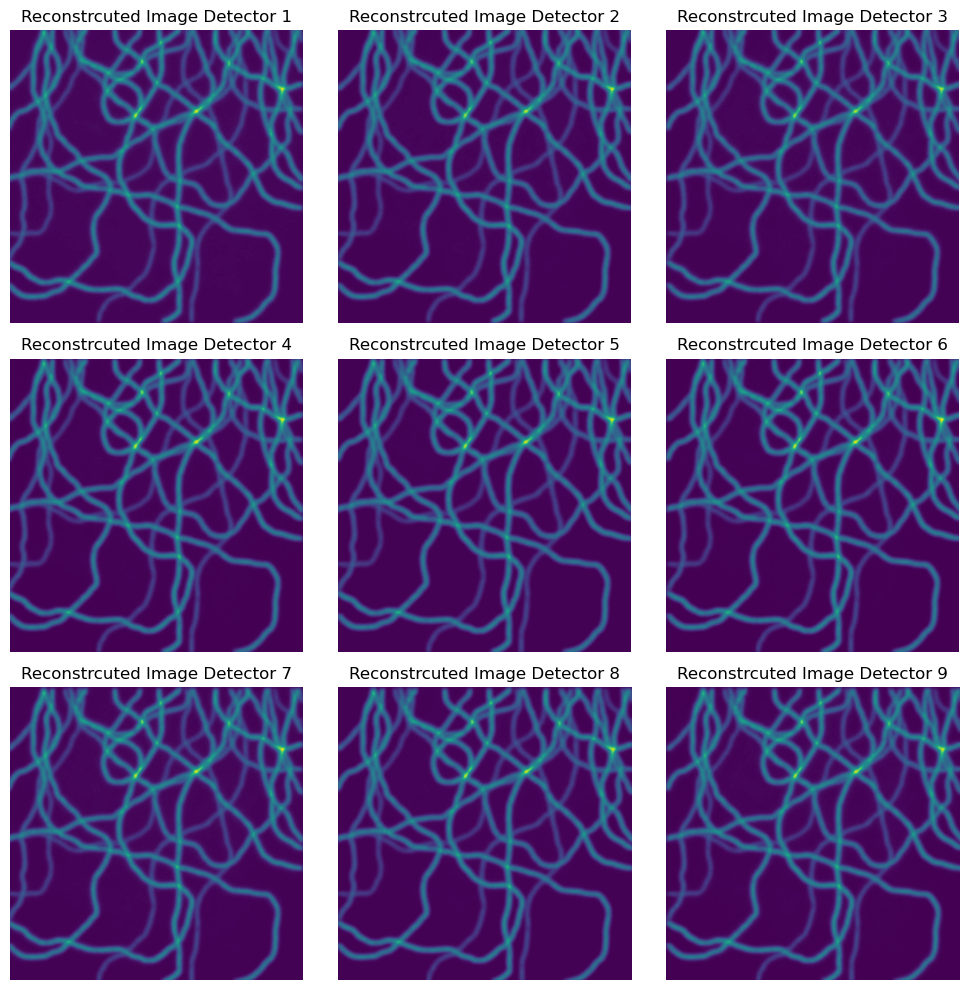

In [152]:
folder_path = "data/temp"
image_prefix = "recon_"

N = 3
fig, axes = plt.subplots(N, N, figsize=(10, 10))

recon_img = np.empty(PSF3by3.shape)
# Loop over the image indices and plot them in a 3 by 3 grid
for i, ax in enumerate(axes.flatten()):
    image_filename = image_prefix + str(i + 1) + ".png"
    image_path = os.path.join(folder_path, image_filename)

    # Read the image and display it
    image = plt.imread(image_path)
    recon_img[:, :, i] = image;
    ax.imshow(image)
    ax.axis('off')
    ax.set_title("Reconstrcuted Image Detector " + str(i + 1))

plt.tight_layout()
plt.show()

### Confocal vs ISM vs Compressive-ISM

In [153]:
center = 4

confocal = img3by3[:,:,center]
compressive_confocal = recon_img[:,:,center]

usf = 100
ref = 5

shift_1, img_ism_1 = apr.APR(img3by3, usf, ref, pxsize = pxsizex)
ism_apr = np.sum(img_ism_1, axis=-1)

shift_2, ism_recon_img = apr.APR(recon_img, usf, ref, pxsize = pxsizex)
compressive_ism_apr = np.sum(ism_recon_img, axis=-1)

ism_deconv = deconv.MultiImg_RL_FFT( PSF3by3, img3by3, max_iter = 10)
compressive_ism_deconv = deconv.MultiImg_RL_FFT( PSF3by3, recon_img, max_iter = 10)

## Plot Figure

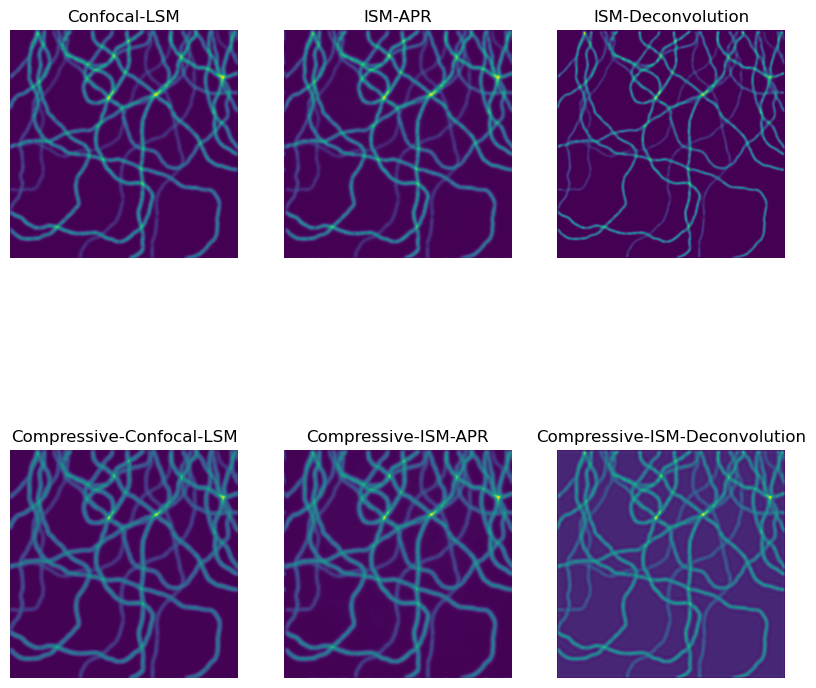

In [154]:
# Define the list of names for the images
image_names = ['Confocal-LSM', 'ISM-APR', 'ISM-Deconvolution', 'Compressive-Confocal-LSM', 'Compressive-ISM-APR', 'Compressive-ISM-Deconvolution']

# Define the list of corresponding images
images = [confocal, ism_apr, ism_deconv,  compressive_confocal, compressive_ism_apr, compressive_ism_deconv]


fig = plt.figure(figsize=(10,10))

# Loop through the images and plot them
for i in range(len(images)):
    ax = fig.add_subplot(2, 3, i+1)
    ax.imshow(images[i])
    ax.set_title(image_names[i])
    ax.axis('off')
    plt.savefig('data/temp/final.png')
    

plt.show()

# Loop over the names and images and create and save each image
for name, image in zip(image_names, images):
    fig, axs = plt.subplots(figsize=(10, 5))  
    axs.imshow(image)
    axs.axis('off')  
    plt.savefig(os.path.join('data/temp/', name + '.png'), bbox_inches='tight', pad_inches=0)
    plt.close(fig)